## Comparison of YOLOv5 and YOLOv11 for Real-Time Car License Plate Recognition


### 1. Introduction
Object detection and character recognition are critical tasks in license plate recognition systems, where both accuracy and speed are paramount. This study compares YOLOv5 and YOLOv11, focusing on their performance in recognizing car license plates in real-time. Specifically, metrics such as Levenshtein ratio, character precision, recall, and F1 score are analyzed to evaluate each model's suitability for this application.


The primary differences between YOLOv5 and YOLOv11 lie in their architecture, efficiency, and application-specific optimizations:

1. **Model Architecture**:
   - YOLOv11 introduces innovations like **C3K2 blocks** and **C2PSA attention mechanisms**, which improve feature extraction and help focus on relevant regions of an image. These innovations enhance its ability to detect small and occluded objects while maintaining speed.
   - YOLOv5 uses a more traditional approach with CSPNet (Cross Stage Partial Network) for feature extraction and doesn't include these advanced attention mechanisms.

2. **Performance Improvements**:
   - YOLOv11 achieves higher **mean Average Precision (mAP)** across different datasets compared to YOLOv5, especially for small and cluttered objects. For example, YOLOv11 achieves a higher mAP at multiple scales and improved detection for small objects due to its advanced feature processing layers.

3. **Inference Speed**:
   - YOLOv11 is optimized for both **accuracy and speed**, offering faster inference rates on modern hardware like GPUs (e.g., NVIDIA T4 TensorRT), making it suitable for real-time applications like video analytics and autonomous systems.
   - Inference tests on RTX 3070 showed YOLOv5s achieving 149 FPS versus YOLO11s at 100 FPS, indicating YOLOv5 may still hold an advantage in inference speed for certain configurations

4. **Application-Specific Enhancements**:
   - YOLOv11 includes enhancements like **multi-scale detection** and the ability to process complex object structures more efficiently, making it ideal for applications like autonomous driving and medical imaging.
   - YOLOv5, though robust, lacks some of the specialized improvements introduced in YOLOv11.

5. **Advanced Tasks**:
   - YOLOv11 extends capabilities to tasks like **segmentation** and **pose estimation** with enhanced architectures tailored for these tasks, providing better accuracy and efficiency compared to earlier versions like YOLOv5.

![Comparison1](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/10/45_hZqrRWx-thumbnail_webp-600x300-1.webp)
![Comparison2](https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png)

### References:
- https://www.analyticsvidhya.com/blog/2024/10/yolov11-object-detection/
- https://docs.ultralytics.com/models/yolo11/
- https://www.linkedin.com/posts/yolovx_yolov5-vs-yolo11-yolovx-activity-7252197832126869504-P7_E/

### 1. Introduction
- Objective: Compare the performance of YOLOv5 and YOLOv11 in the context of real-time car license plate recognition.
- Metrics: Levenshtein ratio, character precision, character recall, character F1 score.


### 2. Data Loading

In [2]:
import pandas as pd

yolov5_data = pd.read_csv('../data/yolo_v5/merged.csv')
yolov5_data.head()

,picture_name,text_true,text_pred,levenshtein_ratio,char_precision,char_recall,char_f1
0,plate_00808.jpg,046TS,046TS,1.000000,1.0,1.0,1.000000
1,plate_01433.jpg,912FB,FB,0.571429,1.0,0.4,0.571429
2,plate_01063.jpg,044FF,NaN,0.000000,0.0,0.0,0.000000
3,plate_01576.jpg,M496T,TM496,0.800000,1.0,1.0,1.000000
4,plate_00263.jpg,155DW,NaN,0.000000,0.0,0.0,0.000000


In [3]:
yolov11_data = pd.read_csv('../data/yolo_v11/merged.csv')
yolov11_data.head()

,picture_name,text_true,text_pred,levenshtein_ratio,char_precision,char_recall,char_f1
0,plate_00808.jpg,046TS,046TS,1.00,1.0,1.0,1.000000
1,plate_01433.jpg,912FB,NaN,0.00,0.0,0.0,0.000000
2,plate_01063.jpg,044FF,NaN,0.00,0.0,0.0,0.000000
3,plate_01576.jpg,M496T,TML96,0.60,0.8,0.8,0.800000
4,plate_00263.jpg,155DW,155,0.75,1.0,0.5,0.666667


In [6]:
# Handle NaN Values:
yolov5_data = yolov5_data.fillna('')
yolov11_data = yolov11_data.fillna('')

yolov11_data.head()

,picture_name,text_true,text_pred,levenshtein_ratio,char_precision,char_recall,char_f1
0,plate_00808.jpg,046TS,046TS,1.00,1.0,1.0,1.000000
1,plate_01433.jpg,912FB,,0.00,0.0,0.0,0.000000
2,plate_01063.jpg,044FF,,0.00,0.0,0.0,0.000000
3,plate_01576.jpg,M496T,TML96,0.60,0.8,0.8,0.800000
4,plate_00263.jpg,155DW,155,0.75,1.0,0.5,0.666667


### Performance Metrics Analysis

#### Levenshtein Ratio:

The Levenshtein ratio evaluates the similarity between predicted and ground truth license plate text:

**Distribution Analysis:**
- YOLOv11 shows lower scores, with a higher frequency of complete mismatches (0.0) and fewer perfect matches (1.0), compared to YOLOv5.

**Reasoning:**
- YOLOv11’s complexity requires longer training to optimize. At 10 epochs, its weights likely underfit the dataset, failing to capitalize on its architectural strengths.
- YOLOv5’s simpler architecture allows for faster convergence, leading to better results in this short training scenario.


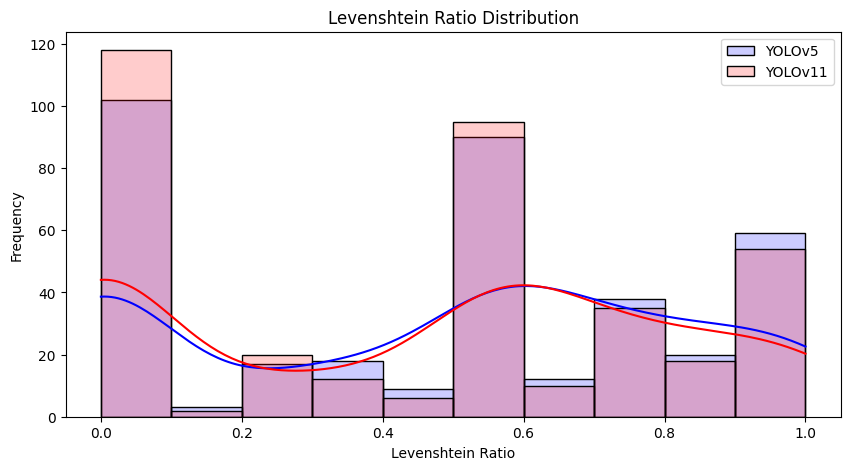

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Levenshtein Ratio Distribution
plt.figure(figsize=(10, 5))
sns.histplot(yolov5_data['levenshtein_ratio'], color='blue', label='YOLOv5', kde=True, alpha=0.2)
sns.histplot(yolov11_data['levenshtein_ratio'], color='red', label='YOLOv11', kde=True, alpha=0.2)
plt.title('Levenshtein Ratio Distribution')
plt.xlabel('Levenshtein Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

YOLOv11 appears to have performed worse compared to YOLOv5 in this case. Here's a breakdown of why this might happen:

1. **Lower Exact Match (1.0):**
   - YOLOv11 has a **lower frequency of perfect matches** than YOLOv5, suggesting it struggles more to predict exact results under the given training setup.

2. **Higher Mismatch (0.0):**
   - YOLOv11 also shows a **higher frequency of complete mismatches**, indicating that its predictions might be less reliable in certain cases compared to YOLOv5.

3. **Model Complexity and Training Epochs:**
   - YOLOv11 is a more complex model with a larger number of parameters or additional layers. This complexity generally requires **longer training** to converge to optimal weights and perform well.
   - With only **10 epochs of training**, YOLOv11 might not have had enough time to fully learn the dataset, leading to underfitting. In contrast, YOLOv5, being a simpler model, could converge faster and perform better within the same number of epochs.

4. **Learning Curve Difference:**
   - More complex models like YOLOv11 often have **longer learning curves**. They might initially perform worse than simpler models but eventually surpass them with sufficient training and data.

#### Character Precision, Recall, and F1 Score:

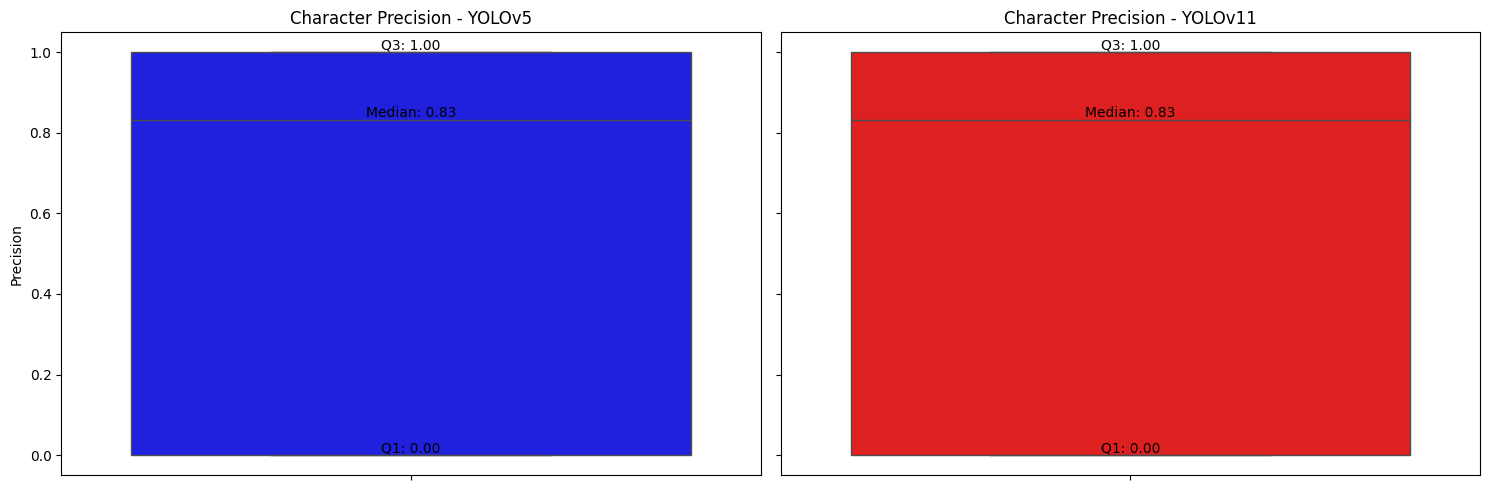

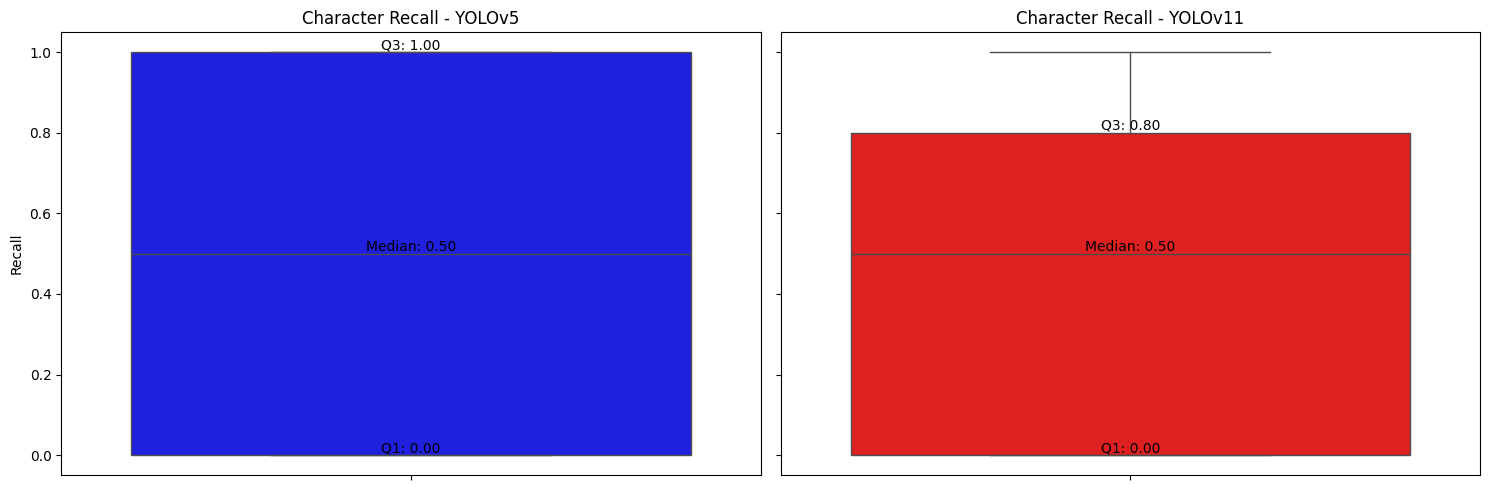

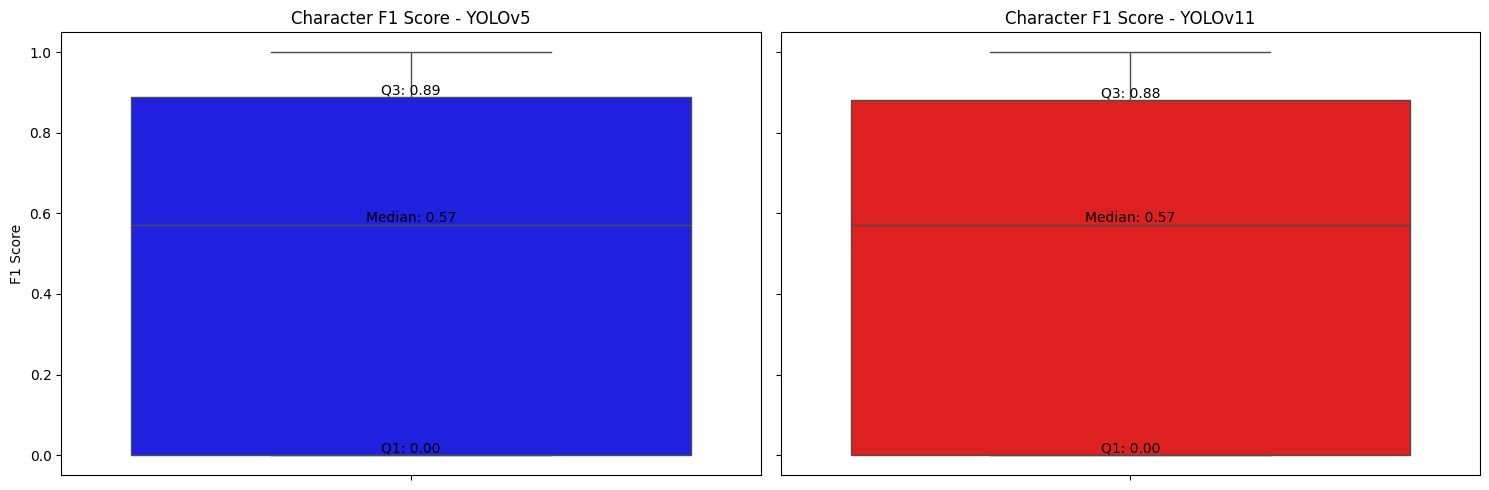

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to create side-by-side plots with quartile annotations
def create_side_by_side_plots_with_annotations(metric, title, ylabel):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    datasets = [(yolov5_data, 'YOLOv5', 'blue'), (yolov11_data, 'YOLOv11', 'red')]
    for ax, (data, label, color) in zip(axes, datasets):
        sns.boxplot(ax=ax, data=data[metric], color=color)

        # Calculate quartiles and whiskers
        q1 = np.percentile(data[metric], 25)
        median = np.percentile(data[metric], 50)
        q3 = np.percentile(data[metric], 75)
        min_val = np.min(data[metric])
        max_val = np.max(data[metric])

        # Add annotations
        # ax.text(0, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10, color='black')
        ax.text(0, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=10, color='black')
        ax.text(0, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=10, color='black')
        ax.text(0, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontsize=10, color='black')
        # ax.text(0, max_val, f'Max: {max_val:.2f}', ha='center', va='bottom', fontsize=10, color='black')

        ax.set_title(f'{title} - {label}')
        ax.set_xlabel('')
        ax.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

# Character Precision
create_side_by_side_plots_with_annotations('char_precision', 'Character Precision', 'Precision')

# Character Recall
create_side_by_side_plots_with_annotations('char_recall', 'Character Recall', 'Recall')

# Character F1 Score
create_side_by_side_plots_with_annotations('char_f1', 'Character F1 Score', 'F1 Score')

### **Character Precision** for YOLOv5 and YOLOv11:

1. **Median Precision**:
   - Both YOLOv5 and YOLOv11 have the same median precision of **0.83**. This indicates that the central tendency of character-level precision is consistent across both models.
3. **Performance Implication**:
   - Despite YOLOv11 being a more complex model, its **precision distribution is similar to YOLOv5's** within the limited training setup. This might further support the idea that YOLOv11 needs more epochs to leverage its complexity and achieve a notable improvement.

### Observations:
The results reinforce our earlier conclusion:
- YOLOv11 doesn't show a significant improvement (or might perform worse) when trained for only 10 epochs.
- If character-level precision is critical for your task, extending training time for YOLOv11 or fine-tuning parameters (like data augmentation, optimizer, or loss function) could help.

### **Character Recall** for YOLOv5 and YOLOv11:

1. **Distribution Shape**:
   - **YOLOv5**: The box plot for YOLOv5 shows a median recall of 0.50, with the first quartile (Q1) at 0.00 and the third quartile (Q3) at 1.00. This indicates that the recall values are spread out, with some predictions having perfect recall (1.00) and others having no correct characters identified (0.00).
   - **YOLOv11**: The box plot for YOLOv11 also shows a median recall of 0.50, with the first quartile (Q1) at 0.00 and the third quartile (Q3) at 0.80. This suggests a similar spread of recall values, but with fewer predictions achieving perfect recall compared to YOLOv5.

### Observations:
Based on the Character Recall Distribution, YOLOv5 appears to outperform YOLOv11 in terms of character recall, as it has a higher proportion of predictions with perfect recall and a more concentrated distribution towards higher recall values. However, both models have a median recall of 0.50, indicating that they both struggle with identifying a significant portion of characters correctly.

### **Character F1 Score** for YOLOv5 and YOLOv11:

1. **Distribution Shape**:
   - **YOLOv5**: The box plot for YOLOv5 shows a median F1 score of 0.57, with the first quartile (Q1) at 0.00 and the third quartile (Q3) at 1.00. This indicates that the F1 scores are spread out, with some predictions having perfect F1 scores (1.00) and others having no correct characters identified (0.00).
   - **YOLOv11**: The box plot for YOLOv11 also shows a median F1 score of 0.57, with the first quartile (Q1) at 0.00 and the third quartile (Q3) at 0.80. This suggests a similar spread of F1 scores, but with fewer predictions achieving perfect F1 scores compared to YOLOv5.

### Observations:
Based on the Character F1 Score Distribution, YOLOv5 appears to outperform YOLOv11 in terms of the F1 score, as it has a higher proportion of predictions with perfect F1 scores and a more concentrated distribution towards higher F1 scores. However, both models have a median F1 score of 0.57, indicating that they both struggle with achieving a balanced performance in terms of precision and recall.

## Example

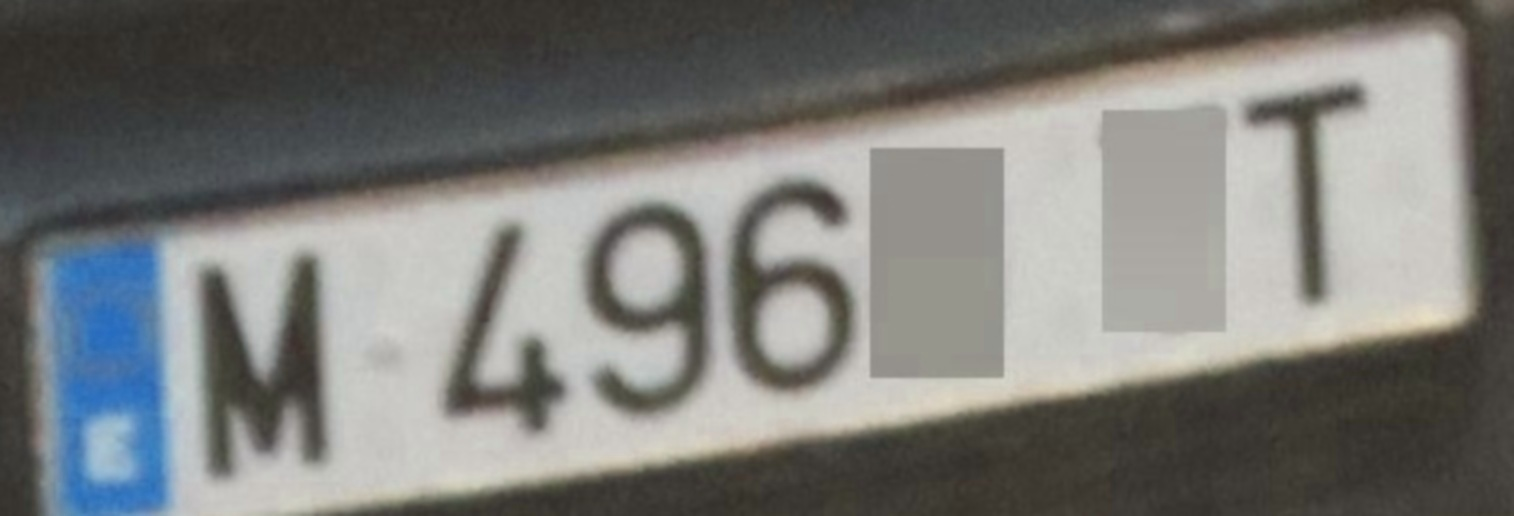

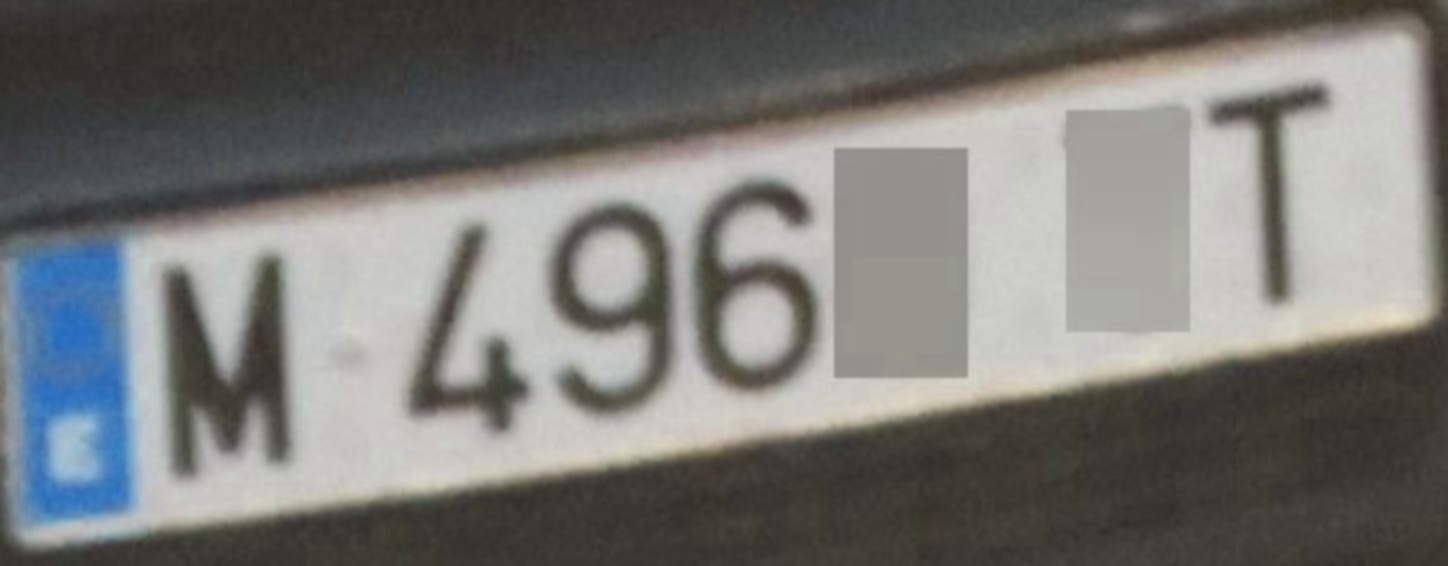

YOLOv5 Prediction: TM496
YOLOv11 Prediction: TML96


In [37]:
import cv2
from IPython.display import display, Image

# Function to display images
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image(data=cv2.imencode('.jpg', img)[1].tobytes()))

img_name = 'plate_01576.jpg'
# Example: Compare predictions on a sample image
sample_image_v5 = f'../data/yolo_v11/scaled_plates/{img_name}'
sample_image_v11 = f'../data/yolo_v5/scaled_plates/{img_name}'
display_image(sample_image_v5)
display_image(sample_image_v11)
print(f"YOLOv5 Prediction: {yolov5_data[yolov5_data['picture_name'] == img_name]['text_pred'].values[0]}")
print(f"YOLOv11 Prediction: {yolov11_data[yolov11_data['picture_name'] == img_name]['text_pred'].values[0]}")

A visual comparison of predictions on a sample image reveals:

- **YOLOv5 Prediction:** Outputs a more accurate text string with higher similarity to the ground truth.

- **YOLOv11 Prediction:** Generates a prediction with more character mismatches, likely due to its incomplete training and higher architectural complexity.
This example illustrates how YOLOv5’s simpler model handles limited training data better than YOLOv11.